In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import re
import multiprocessing
from collections import Counter
import itertools
import json
from IPython.display import display as disp

import numpy as np
# import bottleneck as bn
import pandas as pd
import networkx as nx
import igraph as ig
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper', style='whitegrid', color_codes=True, font_scale=1.8)
colorcycle = [(0.498, 0.788, 0.498),
              (0.745, 0.682, 0.831),
              (0.992, 0.753, 0.525),
              (0.220, 0.424, 0.690),
              (0.749, 0.357, 0.090),
              (1.000, 1.000, 0.600),
              (0.941, 0.008, 0.498),
              (0.400, 0.400, 0.400)]
%matplotlib inline
sns.set_palette(colorcycle)
mpl.rcParams['figure.max_open_warning'] = 65
mpl.rcParams['figure.figsize'] = [12, 7]

# import warnings
# warnings.simplefilter("ignore", category=DeprecationWarning)
# warnings.simplefilter("ignore", category=mpl.cbook.mplDeprecation)
# warnings.simplefilter("ignore", category=UserWarning)


from speclib import misc, loaders, graph, plotting

pd.set_option('display.max_rows', 55)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)
np.set_printoptions(linewidth=145)

# import pixiedust

In [28]:
from importlib import reload as libreload

In [3]:
n = 12

In [68]:
adj_mat = np.random.random((n, n)) * np.sqrt(np.random.random((n, n))) + 1
adj_mat *= np.sign(np.random.random((n, n)) - 0.5)
adj_mat[np.random.random((n, n)) > 0.3] = 0
adj_mat[np.eye(n, dtype=bool)] = 0 
g = nx.from_numpy_matrix(adj_mat, create_using=nx.DiGraph()) 

In [71]:
libreload(plotting)
libreload(graph)

<module 'speclib.graph' from '/lscr_paper/allan/scripts/speclib/graph.py'>

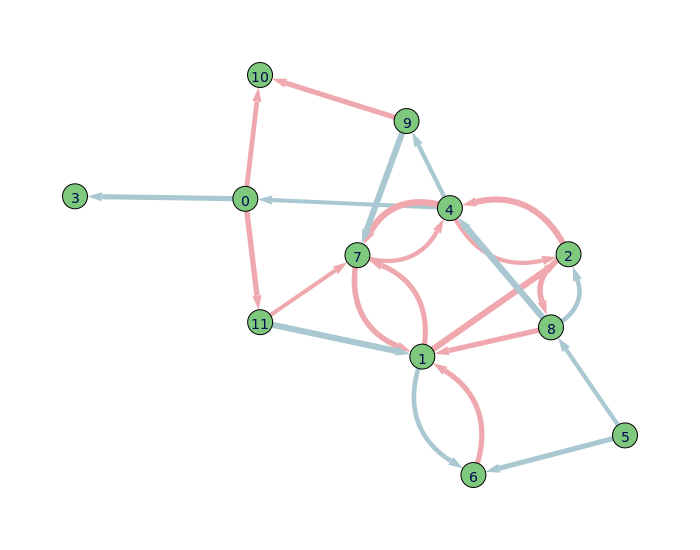

In [75]:
plotting.igdraw(g, allowNegativeWeights=True,
                weightFunc=lambda g: [0.5 + 6*wt/max(g.es['weight']) for wt in g.es['weight']])